In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, f_oneway, spearmanr, gaussian_kde

## Данный датасет взят из kaggle и содержит информацию об образе жизни человека.

https://www.kaggle.com/datasets/jockeroika/life-style-data

In [62]:
df = pd.read_csv('Final_data.csv')
df.head().T

,0,1,2,3,4
Age,34.91,23.37,33.2,38.69,45.09
Gender,Male,Female,Female,Female,Male
Weight (kg),65.27,56.41,58.98,93.78,52.42
Height (m),1.62,1.55,1.67,1.7,1.88
Max_BPM,188.58,179.43,175.04,191.21,193.58
Avg_BPM,157.65,131.75,123.95,155.1,152.88
Resting_BPM,69.05,73.18,54.96,50.07,70.84
Session_Duration (hours),1.0,1.37,0.91,1.1,1.08
Calories_Burned,1080.9,1809.91,802.26,1450.79,1166.4
Workout_Type,Strength,HIIT,Cardio,HIIT,Strength


In [27]:
df.shape

(20000, 54)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            20000 non-null  float64 
 1   Gender                         20000 non-null  object  
 2   Weight (kg)                    20000 non-null  float64 
 3   Height (m)                     20000 non-null  float64 
 4   Max_BPM                        20000 non-null  float64 
 5   Avg_BPM                        20000 non-null  float64 
 6   Resting_BPM                    20000 non-null  float64 
 7   Session_Duration (hours)       20000 non-null  float64 
 8   Calories_Burned                20000 non-null  float64 
 9   Workout_Type                   20000 non-null  object  
 10  Fat_Percentage                 20000 non-null  float64 
 11  Water_Intake (liters)          20000 non-null  float64 
 12  Workout_Frequency (days/week)  2

##### Персональные данные и антропометрия
| Оригинальное название | Перевод | Описание |
|----------------------|---------|----------|
| Age | Возраст | Возраст в годах |
| Gender | Пол | Гендерная принадлежность |
| Weight (kg) | Вес (кг) | Масса тела в килограммах |
| Height (m) | Рост (м) | Рост в метрах |
| BMI | ИМТ | Индекс массы тела |
| BMI_calc | ИМТ_расчетный | Расчетный индекс массы тела |
| Fat_Percentage | Процент жира | Процент жира в организме |
| lean_mass_kg | Сухая масса (кг) | Масса без учета жира в килограммах |

##### Показатели сердечной деятельности
| Оригинальное название | Перевод | Описание |
|----------------------|---------|----------|
| Max_BPM | Макс. ЧСС | Максимальная частота сердечных сокращений |
| Avg_BPM | Средн. ЧСС | Средняя частота сердечных сокращений |
| Resting_BPM | ЧСС покоя | Частота сердечных сокращений в состоянии покоя |
| pct_HRR | % резерва ЧСС | Процент резерва частоты сердечных сокращений |
| pct_maxHR | % макс. ЧСС | Процент от максимальной частоты сердечных сокращений |

##### Тренировки и физическая активность
| Оригинальное название | Перевод | Описание |
|----------------------|---------|----------|
| Workout_Type | Тип тренировки | Тип выполняемой тренировки |
| Session_Duration (hours) | Продолжительность сессии (часы) | Длительность тренировочной сессии в часах |
| Workout_Frequency (days/week) | Частота тренировок (дней/неделю) | Количество тренировок в неделю |
| Experience_Level | Уровень опыта | Уровень спортивного опыта |
| Physical exercise | Физические упражнения | Тип физических упражнений |
| Name of Exercise | Название упражнения | Наименование упражнения |
| Sets | Подходы | Количество подходов |
| Reps | Повторения | Количество повторений |
| Benefit | Польза | Польза от упражнения |
| Burns Calories (per 30 min) | Сжигание калорий (за 30 мин) | Количество сжигаемых калорий за 30 минут |
| Target Muscle Group | Целевая группа мышц | Целевая мышечная группа |
| Equipment Needed | Необходимое оборудование | Требуемое оборудование |
| Difficulty Level | Уровень сложности | Уровень сложности упражнения |
| Body Part | Часть тела | Задействованная часть тела |
| Type of Muscle | Тип мышц | Тип мышечных волокон |
| Workout | Тренировка | Описание тренировки |
| Burns Calories (per 30 min)_bc | Сжигание калорий (за 30 мин)_bc | Дублирующая колонка сжигания калорий |
| Burns_Calories_Bin | Бинаризация сжигания калорий | Категоризация сжигания калорий |

##### Питание и макронутриенты
| Оригинальное название | Перевод | Описание |
|----------------------|---------|----------|
| Daily meals frequency | Частота приемов пищи | Количество приемов пищи в день |
| Carbs | Углеводы | Потребление углеводов в граммах |
| Proteins | Белки | Потребление белков в граммах |
| Fats | Жиры | Потребление жиров в граммах |
| Calories | Калории | Общее потребление калорий |
| cal_from_macros | Калории из макросов | Калории, рассчитанные из макронутриентов |
| pct_carbs | % углеводов | Процент калорий из углеводов |
| protein_per_kg | Белок на кг | Потребление белка на килограмм веса |
| meal_name | Название блюда | Наименование блюда |
| meal_type | Тип приема пищи | Тип приема пищи (завтрак, обед и т.д.) |
| diet_type | Тип диеты | Тип соблюдаемой диеты |
| sugar_g | Сахар (г) | Содержание сахара в граммах |
| sodium_mg | Натрий (мг) | Содержание натрия в миллиграммах |
| cholesterol_mg | Холестерин (мг) | Содержание холестерина в миллиграммах |
| serving_size_g | Размер порции (г) | Вес порции в граммах |
| cooking_method | Способ приготовления | Метод приготовления пищи |
| prep_time_min | Время подготовки (мин) | Время подготовки в минутах |
| cook_time_min | Время готовки (мин) | Время приготовления в минутах |
| rating | Рейтинг | Оценка блюда |

##### Энергетический баланс
| Оригинальное название | Перевод | Описание |
|----------------------|---------|----------|
| Calories_Burned | Сожженные калории | Количество сожженных калорий |
| cal_balance | Баланс калорий | Разница между потребленными и потраченными калориями |
| expected_burn | Ожидаемое сжигание | Ожидаемое количество сожженных калорий |
| Water_Intake (liters) | Потребление воды (литры) | Объем потребляемой воды в литрах |

df.describe()

Датасет не содержит пропусков.

In [29]:
df.isna().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [30]:
print(df.duplicated().sum())

0


#### Посмотрим на выбросы с помощью box-plot

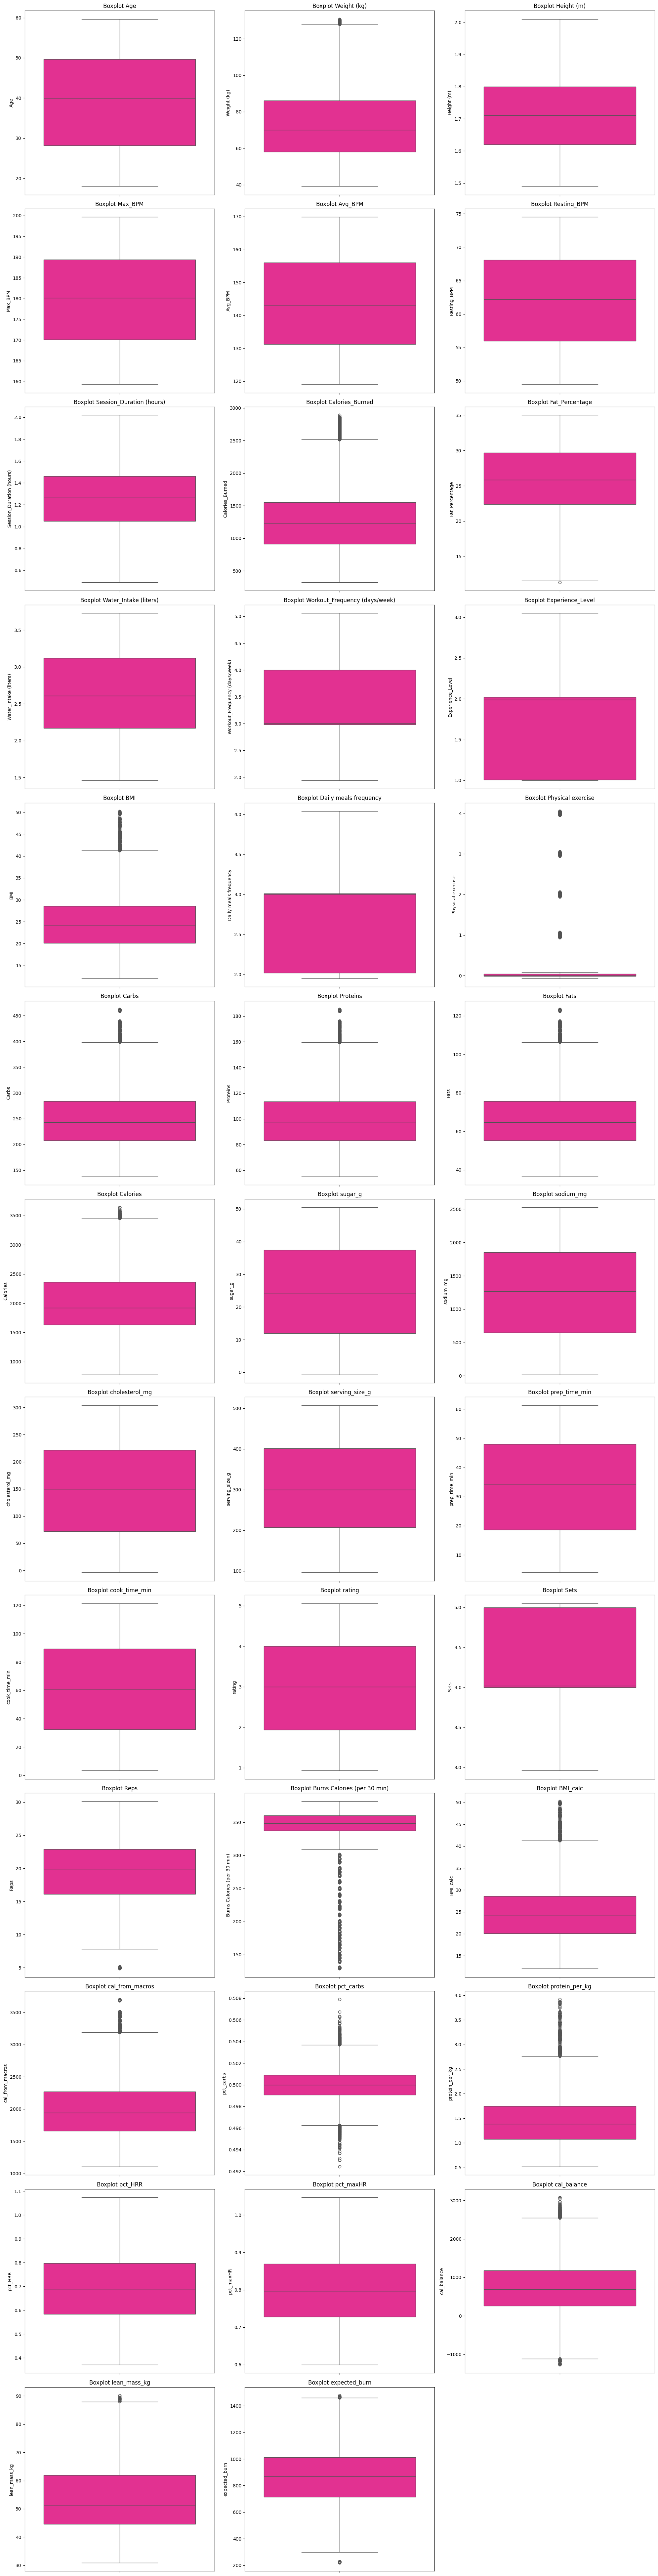

In [51]:
numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i], color = 'deeppink')
        axes[i].set_title(f'Boxplot {col}', fontsize=12)
        axes[i].set_ylabel(col)

for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### Распределения числовых колонок

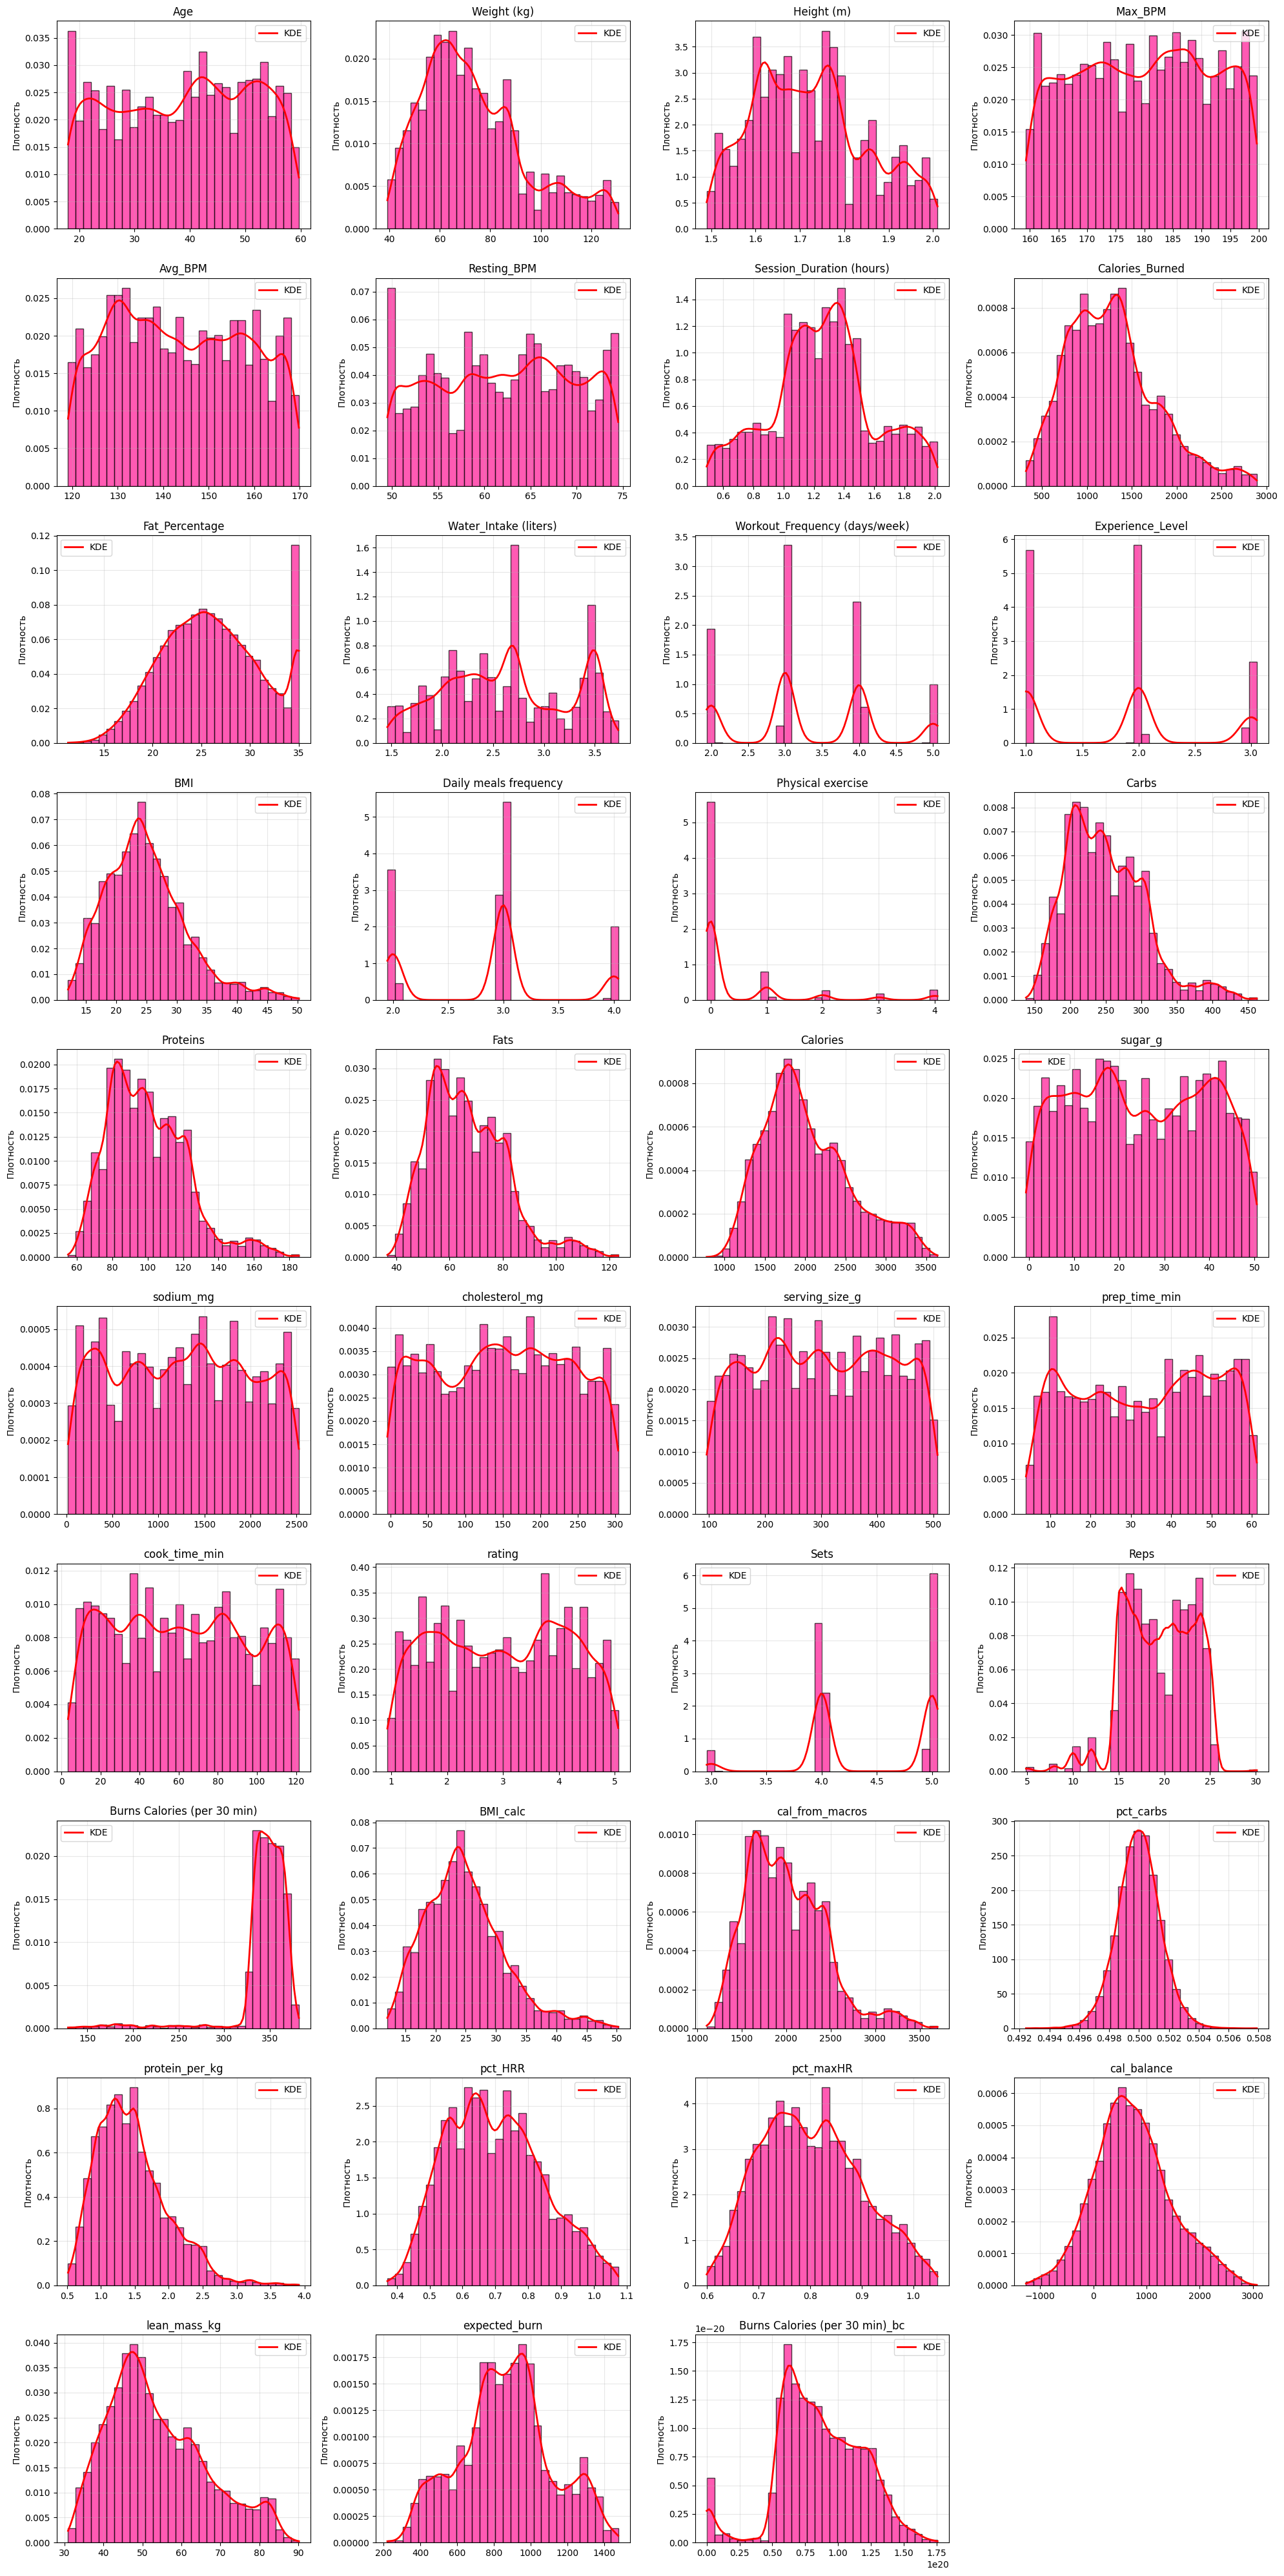

In [32]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    if i < len(axes):
        data = df[column].dropna()
        
        axes[i].hist(data, bins=30, alpha=0.7, color='deeppink', edgecolor='black', density=True)
        
        kde = gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        axes[i].plot(x_range, kde(x_range), color='red', linewidth=2, label='KDE')
        
        axes[i].set_title(f'{column}', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Плотность')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

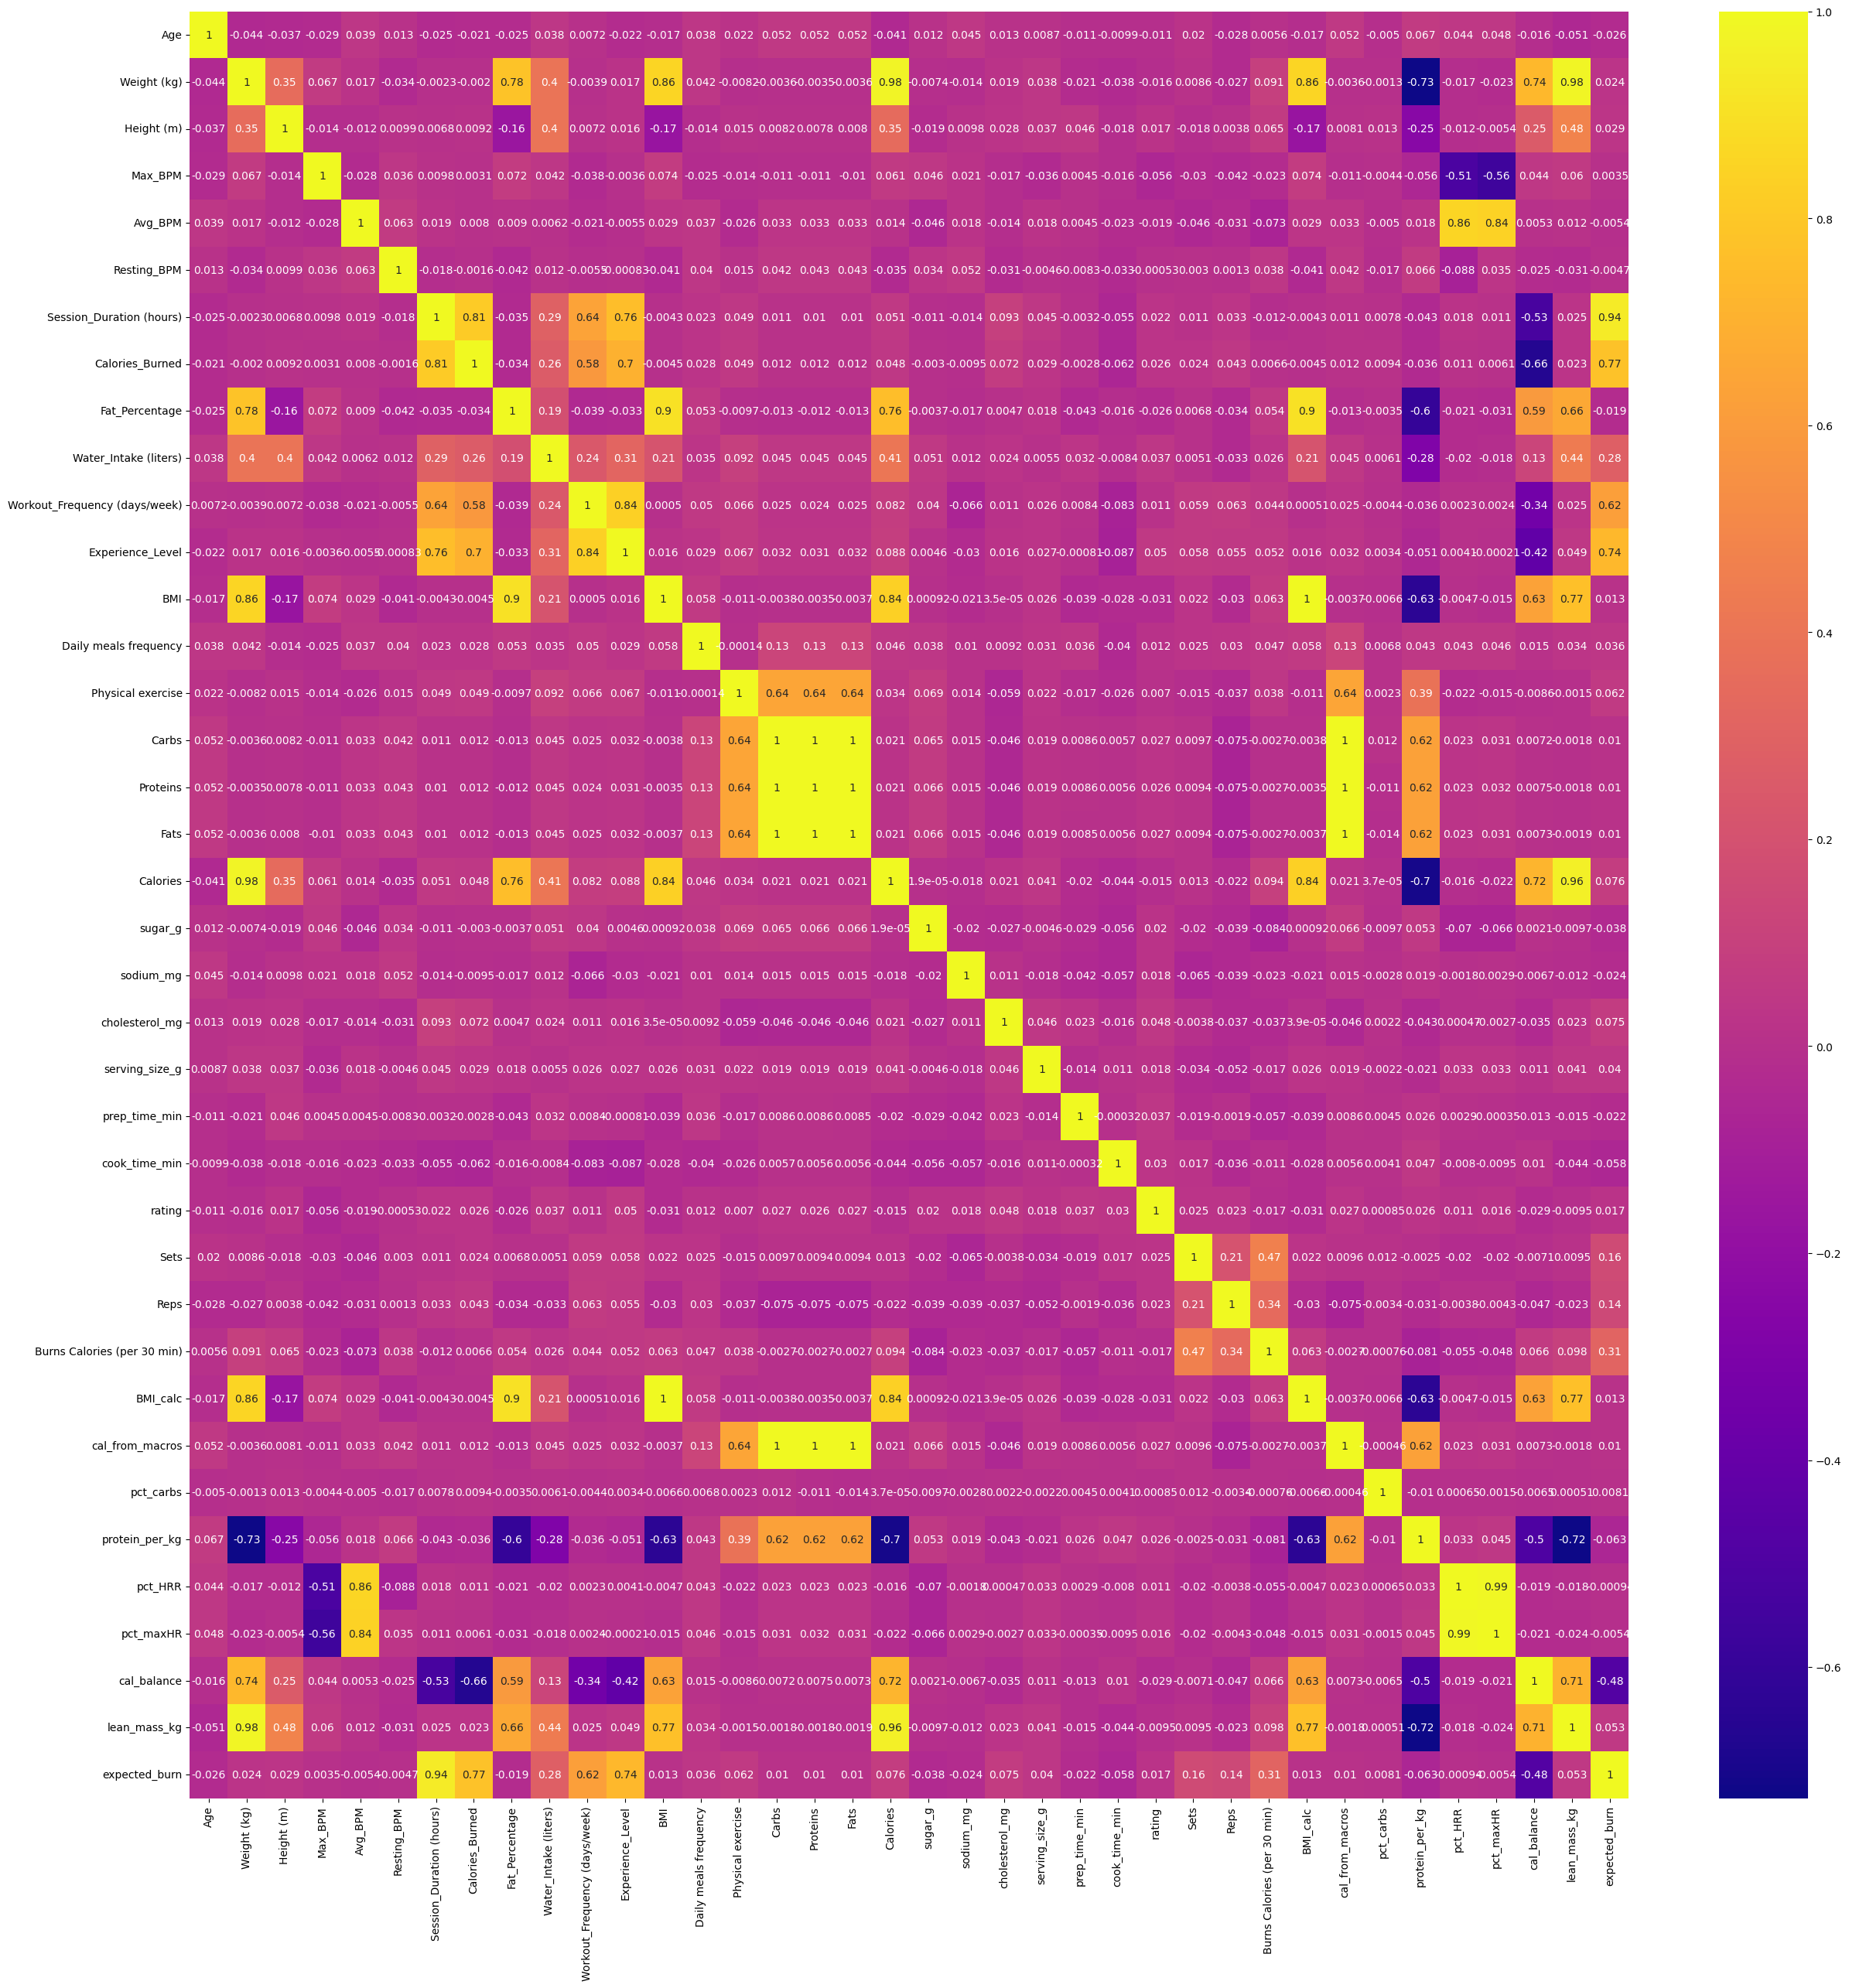

In [57]:
plt.figure(figsize = (30, 30))
selected_column = df.corr(numeric_only = True)
sns.heatmap(selected_column, cmap = 'plasma', annot = True)

In [33]:
sorted(df['Gender'].unique())

['Female', 'Male']

Отдельно представляет интерес связи между двумя колонками: `Burns Calories (per 30 min)` и `Burns Calories (per 30 min)_bc`.

Колонки, связанные с калориями: ['Calories_Burned', 'Calories', 'Burns Calories (per 30 min)', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']


<Axes: >

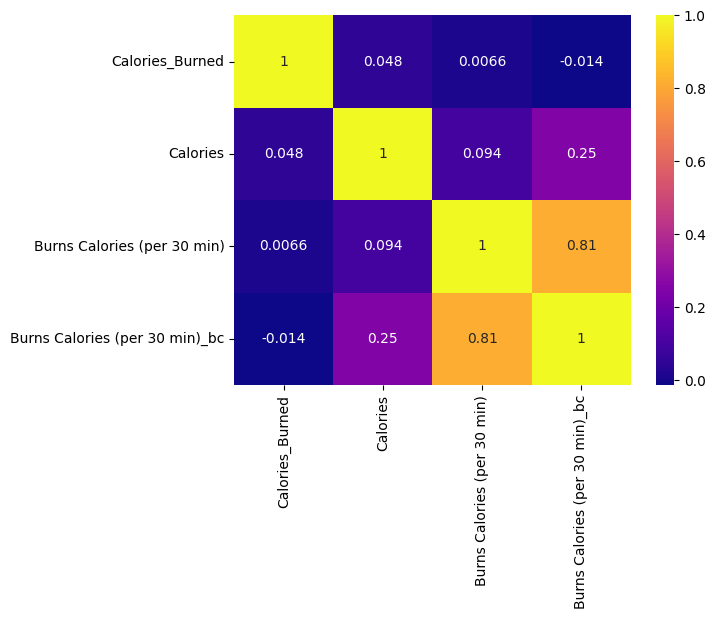

In [34]:
calorie_columns = [col for col in df.columns if 'calori' in col.lower()]
print("Колонки, связанные с калориями:", calorie_columns)
selected_columns = df[calorie_columns].corr(numeric_only = True)
sns.heatmap(selected_columns, cmap = 'plasma', annot = True)

Видно, что они довольно хорошо коррелируют. Коэффициент корреляции составляет 0.81.
Хочется вообще понять, что в ней содержится.

In [35]:
df[['Burns Calories (per 30 min)_bc', 'Burns Calories (per 30 min)']]

,Burns Calories (per 30 min)_bc,Burns Calories (per 30 min)
0,7.260425e+19,342.58
1,1.020506e+20,357.16
2,1.079607e+20,359.63
3,8.987921e+19,351.65
4,5.264685e+19,329.36
...,...,...
19995,7.924402e+19,346.27
19996,5.708474e+19,332.64
19997,9.101285e+19,352.19
19998,5.246436e+19,329.22


Было предположение о том, что колонка `Burns Calories (per 30 min)_bc` содержит в себе перерасчет в других единицах измерения, но ни один из переводов не даёт такие огромные степени, порядка $10^{19} - 10^{20}$.\
Данные выглядят не реалистично для человека, соответственно, мной было принято решение удалить эту колонку.

In [36]:
df.drop('Burns Calories (per 30 min)_bc', inplace = True, axis = 1)

#### Cоотношение женщин и мужчин в датасете

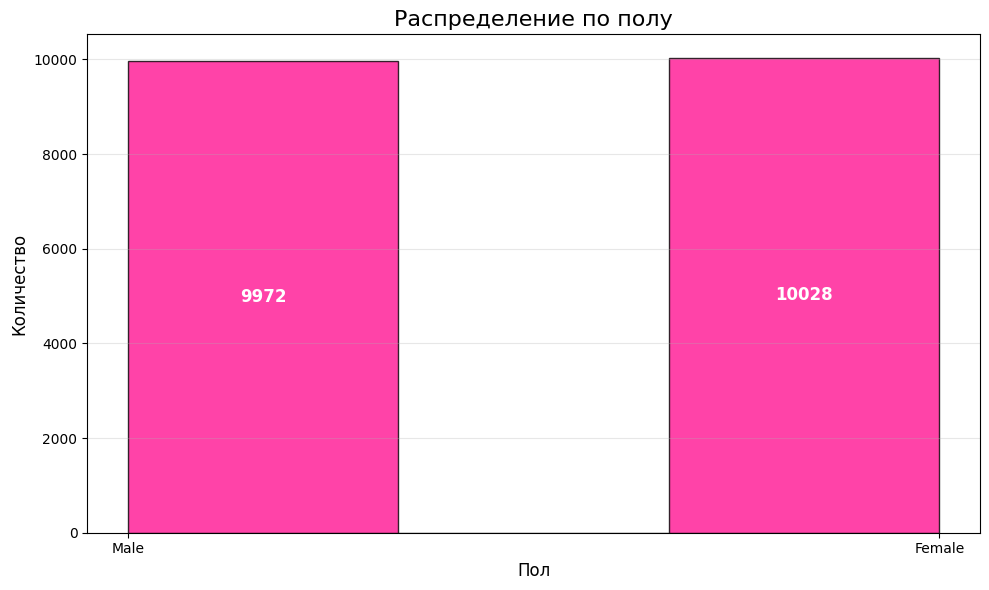

In [37]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['Gender'], bins=3, edgecolor='black', color='deeppink', alpha=0.8)

for i, (count, patch) in enumerate(zip(counts, patches)):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width()/2, count/2, 
                f'{int(count)}', 
                ha='center', va='center', 
                fontsize=12, fontweight='bold', color='white')

plt.title('Распределение по полу', fontsize=16)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

В целом, женщин и мужчин примерно одинаковое количество.

#### Теперь построим некоторые гипотезы.
**1. Люди с более высоким процентом жира в организме (все зависимости от пола) сжигают меньше калорий во время тренировок при прочих равных условиях.**

Эта гипотеза обоснована тем, что существует предположение о том, что высокий процент жира может снижать эффективность метаболизма и физической активности.

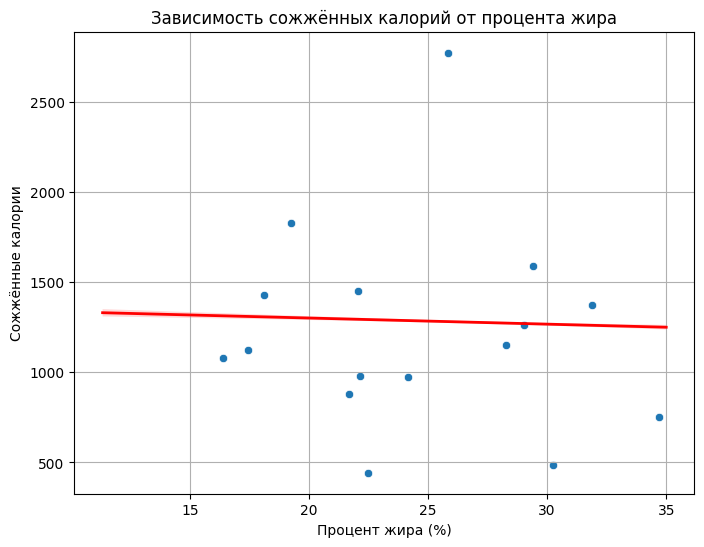

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[df['Age'] == 25], x='Fat_Percentage', y='Calories_Burned')
sns.regplot(data=df, x='Fat_Percentage', y='Calories_Burned', scatter=False, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Зависимость сожжённых калорий от процента жира')
plt.xlabel('Процент жира (%)')
plt.ylabel('Сожжённые калории')
plt.grid(True)
plt.show()

Заметен отрицательный наклон линии тренда для возрастной категории 25 лет. А значит, предположение о том, что полные люди сжигают меньше калорий при физ. нагрузках, нежели люди с меньшим процентом жира имеет место быть и скорее всего, верна.

Общая картина

Отрицательная корреляция - чем выше процент жира, тем меньше калорий сжигается

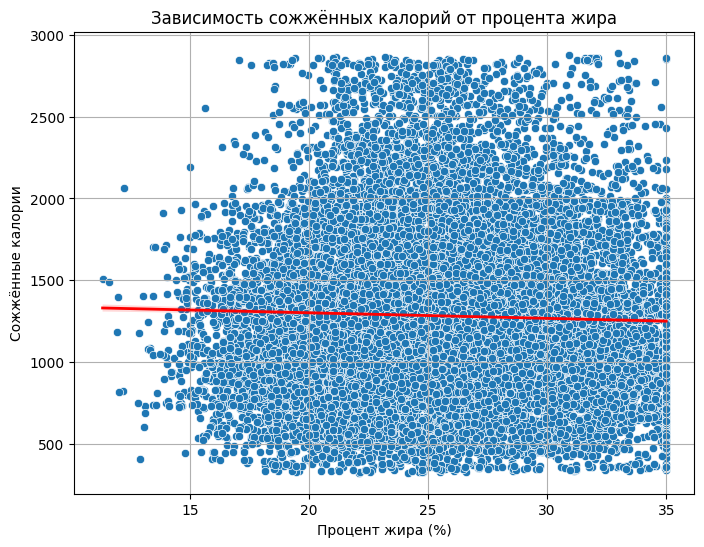

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fat_Percentage', y='Calories_Burned')
sns.regplot(data=df, x='Fat_Percentage', y='Calories_Burned', scatter=False, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Зависимость сожжённых калорий от процента жира')
plt.xlabel('Процент жира (%)')
plt.ylabel('Сожжённые калории')
plt.grid(True)
plt.show()

Проверим её с помощью критерия Пирсона, так как распределение этих колонок близко к нормальному. 

In [40]:
correlation, p_value = pearsonr(df['Fat_Percentage'], df['Calories_Burned'])
print(f"Коэффициент корреляции Пирсона: {correlation:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Корреляция статистически значима")
    if correlation < 0:
        print("Отрицательная корреляция - гипотеза подтверждается")
    else:
        print("Положительная корреляция - гипотеза не подтверждается")
else:
    print("Корреляция не статистически значима")

Коэффициент корреляции Пирсона: -0.034
P-value: 0.00000
Корреляция статистически значима
Отрицательная корреляция - гипотеза подтверждается


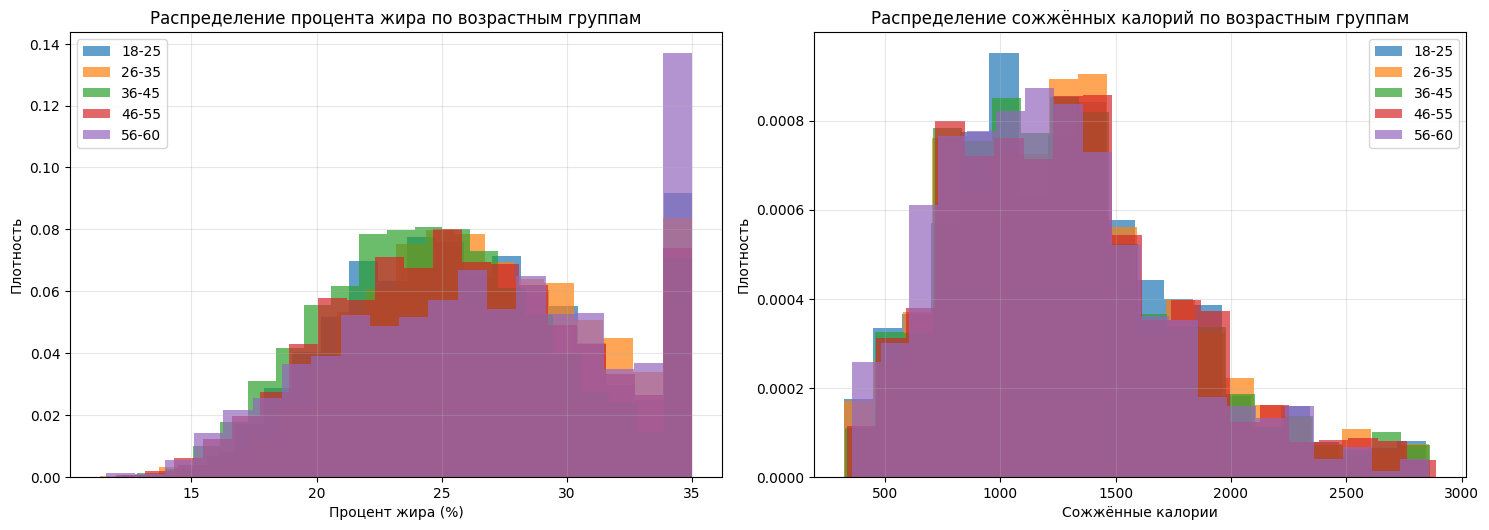

In [58]:
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[18, 25, 35, 45, 55, 60],
                        labels=['18-25', '26-35', '36-45', '46-55', '56-60'])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for i, age_group in enumerate(df['Age_Group'].cat.categories):
    data = df[df['Age_Group'] == age_group]['Fat_Percentage']
    plt.hist(data, bins=20, alpha=0.7, label=age_group, color=colors[i], density=True)
plt.xlabel('Процент жира (%)')
plt.ylabel('Плотность')
plt.title('Распределение процента жира по возрастным группам')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
for i, age_group in enumerate(df['Age_Group'].cat.categories):
    data = df[df['Age_Group'] == age_group]['Calories_Burned']
    plt.hist(data, bins=20, alpha=0.7, label=age_group, color=colors[i], density=True)
plt.xlabel('Сожжённые калории')
plt.ylabel('Плотность')
plt.title('Распределение сожжённых калорий по возрастным группам')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь интересно посмотреть, есть ли какие то стат. значимые различия между возрастными группами. То есть есть предположение о том, что чем человек старше, тем выше процент жира и тем сложнее будет сжечь калории.

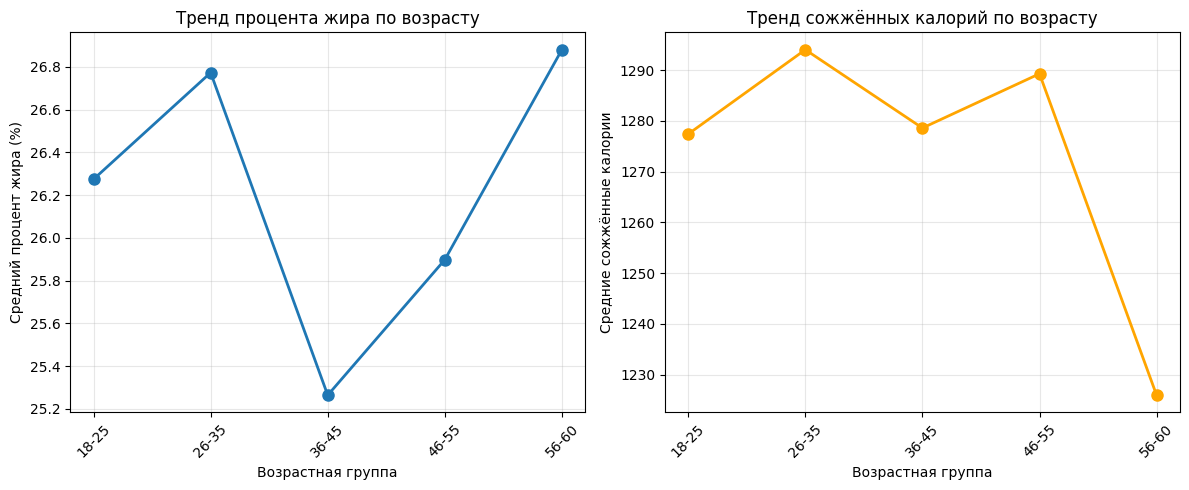

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
age_means = df.groupby('Age_Group', observed = True)['Fat_Percentage'].mean()
plt.plot(age_means.index.astype(str), age_means.values, 'o-', linewidth=2, markersize=8)
plt.xlabel('Возрастная группа')
plt.ylabel('Средний процент жира (%)')
plt.title('Тренд процента жира по возрасту')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
calorie_means = df.groupby('Age_Group', observed = True)['Calories_Burned'].mean()
plt.plot(calorie_means.index.astype(str), calorie_means.values, 'o-', linewidth=2, markersize=8, color='orange')
plt.xlabel('Возрастная группа')
plt.ylabel('Средние сожжённые калории')
plt.title('Тренд сожжённых калорий по возрасту')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Проверяем гипотезу с помощью F-статистики, так как это стандартный выбор для сравнения средних 3+ групп.

In [59]:
fat_groups = [df[df['Age_Group'] == age_group]['Fat_Percentage'] 
              for age_group in df['Age_Group'].cat.categories]
f_stat_fat, p_value_fat = f_oneway(*fat_groups)
print(f"  F-статистика: {f_stat_fat:.3f}, P-value: {p_value_fat:.5f}")

calorie_groups = [df[df['Age_Group'] == age_group]['Calories_Burned'] 
                  for age_group in df['Age_Group'].cat.categories]
f_stat_cal, p_value_cal = f_oneway(*calorie_groups)
print(f"  F-статистика: {f_stat_cal:.3f}, P-value: {p_value_cal:.5f}")

if p_value_fat < 0.05:
    print("Существуют статистически значимые различия в проценте жира между возрастными группами")
else:
    print("Нет значимых различий в проценте жира между возрастными группами")

if p_value_cal < 0.05:
    print("Существуют статистически значимые различия в сожжённых калориях между возрастными группами")
else:
    print("Нет значимых различий в сожжённых калориях между возрастными группами")

  F-статистика: 70.232, P-value: 0.00000
  F-статистика: 7.168, P-value: 0.00001
Существуют статистически значимые различия в проценте жира между возрастными группами
Существуют статистически значимые различия в сожжённых калориях между возрастными группами


**2. Участники с более высокой частотой тренировок в неделю имеют более низкий процент жира в организме**

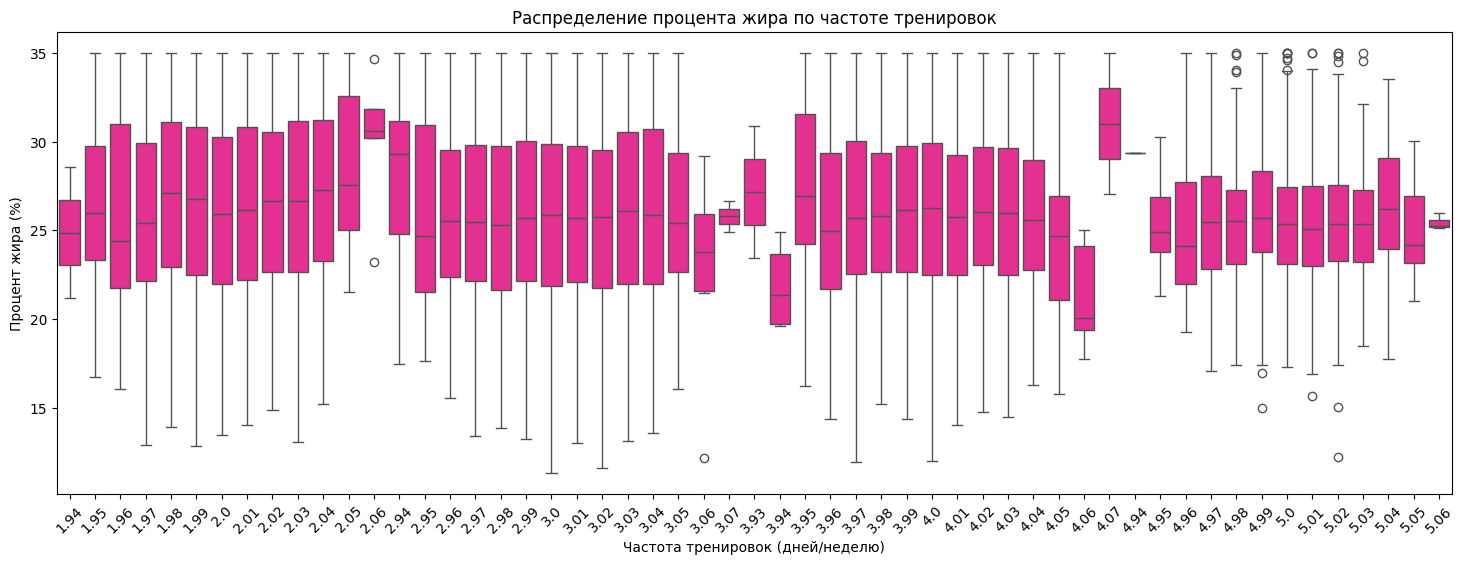

In [45]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Fat_Percentage', color = 'deeppink')
plt.title('Распределение процента жира по частоте тренировок')
plt.xlabel('Частота тренировок (дней/неделю)')
plt.ylabel('Процент жира (%)')
plt.xticks(rotation=45)
plt.show()

Видно, что медианное значение процента жира будет уменьшаться с увеличением частоты тренировок.\
Используем для проверки нашей гипотезы критерий Спирмена, так как он устойчив к выбросам и не требует нормальности распределения.

In [46]:
df['Workout_Frequency_Cat'] = pd.cut(df['Workout_Frequency (days/week)'], 
                                    bins=[0, 2, 4, 7], 
                                    labels=['Низкая', 'Средняя', 'Высокая'])

correlation_spearman, p_value_spearman = spearmanr(df['Workout_Frequency (days/week)'], 
                                                  df['Fat_Percentage'])
print(f"Коэффициент корреляции Спирмена: {correlation_spearman:.3f}")
print(f"P-value: {p_value_spearman:.5f}")

if p_value_spearman < 0.05 and correlation_spearman < 0:
    print("Отрицательная корреляция статистически значима - гипотеза подтверждается")
else:
    print("Гипотеза не подтверждается")

Коэффициент корреляции Спирмена: -0.029
P-value: 0.00005
Отрицательная корреляция статистически значима - гипотеза подтверждается


**3. Тип тренировки влияет на средний пульс во время занятия**

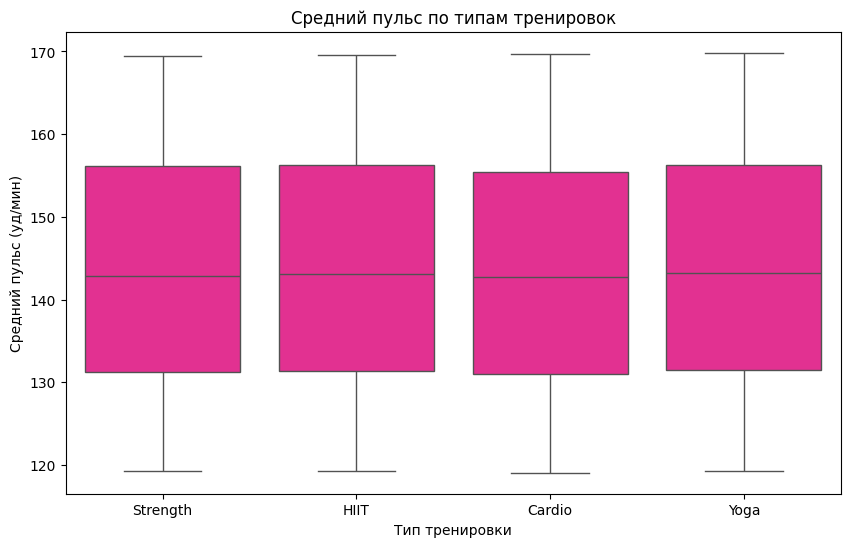

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Avg_BPM', color = 'deeppink')
plt.title('Средний пульс по типам тренировок')
plt.xlabel('Тип тренировки')
plt.ylabel('Средний пульс (уд/мин)')
plt.show()

In [48]:
df[['Workout_Type', 'Avg_BPM', 'Max_BPM', 'Resting_BPM']]

,Workout_Type,Avg_BPM,Max_BPM,Resting_BPM
0,Strength,157.65,188.58,69.05
1,HIIT,131.75,179.43,73.18
2,Cardio,123.95,175.04,54.96
3,HIIT,155.10,191.21,50.07
4,Strength,152.88,193.58,70.84
...,...,...,...,...
19995,Strength,148.18,199.20,63.72
19996,Strength,134.18,196.18,54.04
19997,Strength,157.92,163.34,61.65
19998,Yoga,121.23,179.27,60.88


In [49]:
workout_types = df['Workout_Type'].unique()
groups = [df[df['Workout_Type'] == workout]['Avg_BPM'] for workout in workout_types]

f_stat, p_value_anova = f_oneway(*groups)
print(f"F-статистика: {f_stat:.3f}")
print(f"P-value: {p_value_anova:.5f}")

if p_value_anova < 0.05:
    print("Существуют статистически значимые различия между группами")
else:
    print("Нет статистически значимых различий между группами")

F-статистика: 2.022
P-value: 0.10841
Нет статистически значимых различий между группами


### Выводы:
1. Люди с более высоким процентом жира в организме (вне зависимости от пола) сжигают меньше калорий во время тренировок при прочих равных условиях.
2. Старшему полоклению тяжелее сжигать калории во время тренировок, а также они имеют больший процент жира, чем более молодой возраст.
3. Участники с более высокой частотой тренировок в неделю имеют более низкий процент жира.
4. Тип тренировки не влияет на средний пульс во время занятий.